In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#data frame into np array
X=pd.read_csv("Linear Regression/linearX.csv").values
Y=pd.read_csv("Linear Regression/linearY.csv").values

In [3]:
X.shape

(99, 1)

In [4]:
Y.shape

(99, 1)

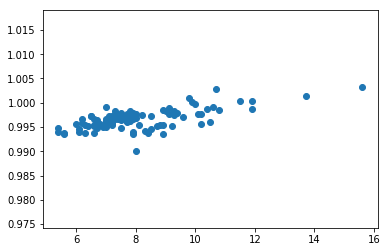

In [5]:
plt.scatter(X,Y)
plt.show()

In [6]:
# Normalizing 

X_norm=(X-np.mean(X))/np.std(X)

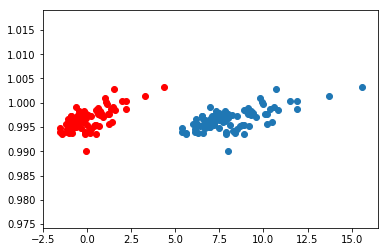

In [7]:
plt.scatter(X,Y)
plt.scatter(X_norm,Y,color='r')
plt.show()

In [8]:
# Linear Regression

In [9]:
def hypothesis(x,theta):
    """
    theta : list of theta0 and theta1
    x: imput value(scalar)
    """
    return theta[0]+theta[1]*x

In [10]:
hypothesis(7,np.array([1.5,2]))

15.5

In [11]:
def error(X,y,theta):
    """
    X: Dataset (99,1)
    y:Dataset(99,1)
    theta : (2,)
    """
    
    m=X.shape[0]
    total_err=0.
    
    for i in range (m):
        y_=hypothesis(X[i],theta)
        total_err+=(y_-y[i])**2
        
    return float(total_err/m)

In [12]:
error(X,Y,np.array([0,0]))

0.9932838201010109

In [13]:
def gradient(X,y,theta):
    """
    X:(99,1)
    Y:(99,1)
    theta:(2,1)
    """
    m=X.shape[0]                         #TOTAL NO OF EXAMPLES
    grad=np.zeros(2)
    
    for i in range(m):
        y_=hypothesis(X[i],theta)
        grad[0]+=(y_-y[i])
        grad[1]+=(y_-y[i])*X[i]
        
    return grad/m

In [14]:
def gradient_des(X,y,lr=0.1,max_itr=100):
    m=X.shape[0]
    theta=np.zeros(2)
    losses=[]
    
    for i in range(100):
        e=error(X,y,theta)
        losses.append(e)
        grad=gradient(X,y,theta)
        theta[0]=theta[0]-lr*grad[0]
        theta[1]=theta[1]-lr*grad[1]
        
    return theta,losses
    
    

In [18]:
Theta,Losses=gradient_des(X,Y)

In [19]:
Theta

array([-1.14547406e+75, -9.64173928e+75])

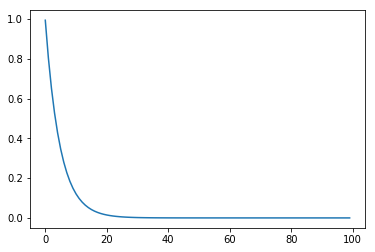

In [104]:
plt.plot(Losses)

In [ ]:
# TEST DATASET

In [105]:
x_test = np.array([-1,0,1,2,3,4,5])

In [106]:
y_pred=hypothesis(x_test,Theta)

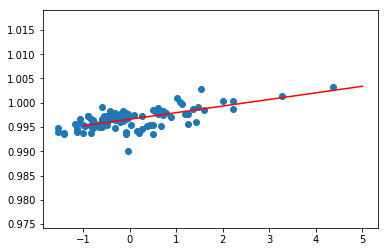

In [108]:
plt.scatter(X_norm,Y)
plt.plot(x_test,y_pred,color="r")
plt.show()

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
lin_reg=LinearRegression()
lin_reg.fit(X_norm,Y)
lin_reg.intercept_

array([0.99663414])

In [123]:
lin_reg.predict(x_test.reshape((-1,1)))

array([[0.9952762 ],
       [0.99663414],
       [0.99799208],
       [0.99935002],
       [1.00070796],
       [1.0020659 ],
       [1.00342384]])

In [124]:
# different Models

In [128]:
from sklearn.svm import SVR
model=SVR()
model.fit(X_norm,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)